In [102]:
using ArgParse; # Argument parsing
using JLD;

# Visualization packages
using DataFrames;
using Plots;

using Statistics;
using HypothesisTests;
using StatsBase;
using StatsPlots;

In [103]:
function meanpositives(mat::Matrix)
    nc = size(mat,1)
    sums = zeros(nc)
    counts = zeros(nc)
    for c in 1:nc
        for r in 1:size(mat,2)
            v = mat[c,r]
            if v >= 0
                sums[c] += v
                counts[c] += 1.0
            end
        end
    end
    Float64[(counts[i]>0 ? sums[i]/counts[i] : 0.0) for i in 1:nc]
end

meanpositives (generic function with 1 method)

In [104]:
function stdpositives(mat::Matrix, means::Vector)
    nc = size(mat,1)
    sums = zeros(nc)
    counts = zeros(nc)
    for c in 1:nc
        for r in 1:size(mat,2)
            v = mat[c,r]
            if v >= 0
                sums[c] += (v-means[c])^2
                counts[c] += 1.0
            end
        end
    end

    Float64[(counts[i]>0 ? sqrt(sums[i]/counts[i]) : 0.0) for i in 1:nc]
end

stdpositives (generic function with 1 method)

In [105]:
function processAllCell!(allCells, BinnedGenerations, num_bins)
    generations = Int[];
    for i in 1:lastindex(allCells)
        # print(size(allCells[i].Np50p50)[1])
        if size(allCells[i].cMyc)[1] >= 721
            if allCells[i].generation72 > 7
                push!(generations, 7);
            elseif allCells[i].generation72 > 0
                push!(generations, allCells[i].generation72);
            end
        end
    end
    # Create a histogram with specified bins
    hist = fit(Histogram, generations, nbins=num_bins)
    # hist = histogram(generations, bins = num_bins)
    for i in 1:num_bins
        if i > length(hist.weights)
            push!(BinnedGenerations, 0)
        else
            push!(BinnedGenerations, hist.weights[i])
        end
    end
end


processAllCell! (generic function with 1 method)

In [121]:
function processAllReplicates!(home_dir, Modifier, Modifier2, File1, num_bins)
    Allgenerations = Vector{Int}[];
    for i in 1:lastindex(File1)
        generations = Int[];
        cells_fn = string(home_dir, Modifier, File1[i], Modifier2, ".jld")
        allCells = load(cells_fn, "allCells");
        processAllCell!(allCells, generations, num_bins);
        push!(Allgenerations, generations)
    end
    Allgenerations = reduce(hcat, Allgenerations);
    meanGEN = meanpositives(Allgenerations);
    stdGEN = stdpositives(Allgenerations, meanGEN);
    return meanGEN, stdGEN, Allgenerations
end

processAllReplicates! (generic function with 3 methods)

In [107]:
num_bins = 7;
bin_indices = Int[];
for i in 1:num_bins
    push!(bin_indices, i)
end

In [108]:
home_dir = "/Users/helenhuang/Downloads/cells_cRelAbundance_";
out_dir = "/Users/helenhuang/Downloads/";
File1 = ["6", "7", "8", "9", "10"];

In [129]:
Modifier = "WTF";
Modifier2 = "n"
(WT_NO_meanGEN, WT_NO_stdGEN, WT_NO_allGEN) = processAllReplicates!(home_dir, Modifier, Modifier2, File1, num_bins);
Modifier = "KOF";
(KO_NO_meanGEN, KO_NO_stdGEN, KO_NO_allGEN) = processAllReplicates!(home_dir, Modifier, Modifier2, File1, num_bins);

Modifier = "WTF";
Modifier2 = ""
(WT_YES_meanGEN, WT_YES_stdGEN, WT_YES_allGEN) = processAllReplicates!(home_dir, Modifier, Modifier2, File1, num_bins);
Modifier = "KOF";
(KO_YES_meanGEN, KO_YES_stdGEN, KO_YES_allGEN) = processAllReplicates!(home_dir, Modifier, Modifier2, File1, num_bins);

┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


In [163]:
curr_gen = 6;

In [164]:
EqualVarianceTTest(WT_YES_allGEN[curr_gen, :], KO_YES_allGEN[curr_gen,:])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          25.6
    95% confidence interval: (17.33, 33.87)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-04

Details:
    number of observations:   [5,5]
    t-statistic:              7.138705747624451
    degrees of freedom:       8
    empirical standard error: 3.586084215408222


In [165]:
EqualVarianceTTest(WT_NO_allGEN[curr_gen, :], KO_NO_allGEN[curr_gen,:])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -39.2
    95% confidence interval: (-55.07, -23.33)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0005

Details:
    number of observations:   [5,5]
    t-statistic:              -5.697337410573446
    degrees of freedom:       8
    empirical standard error: 6.880406964707829


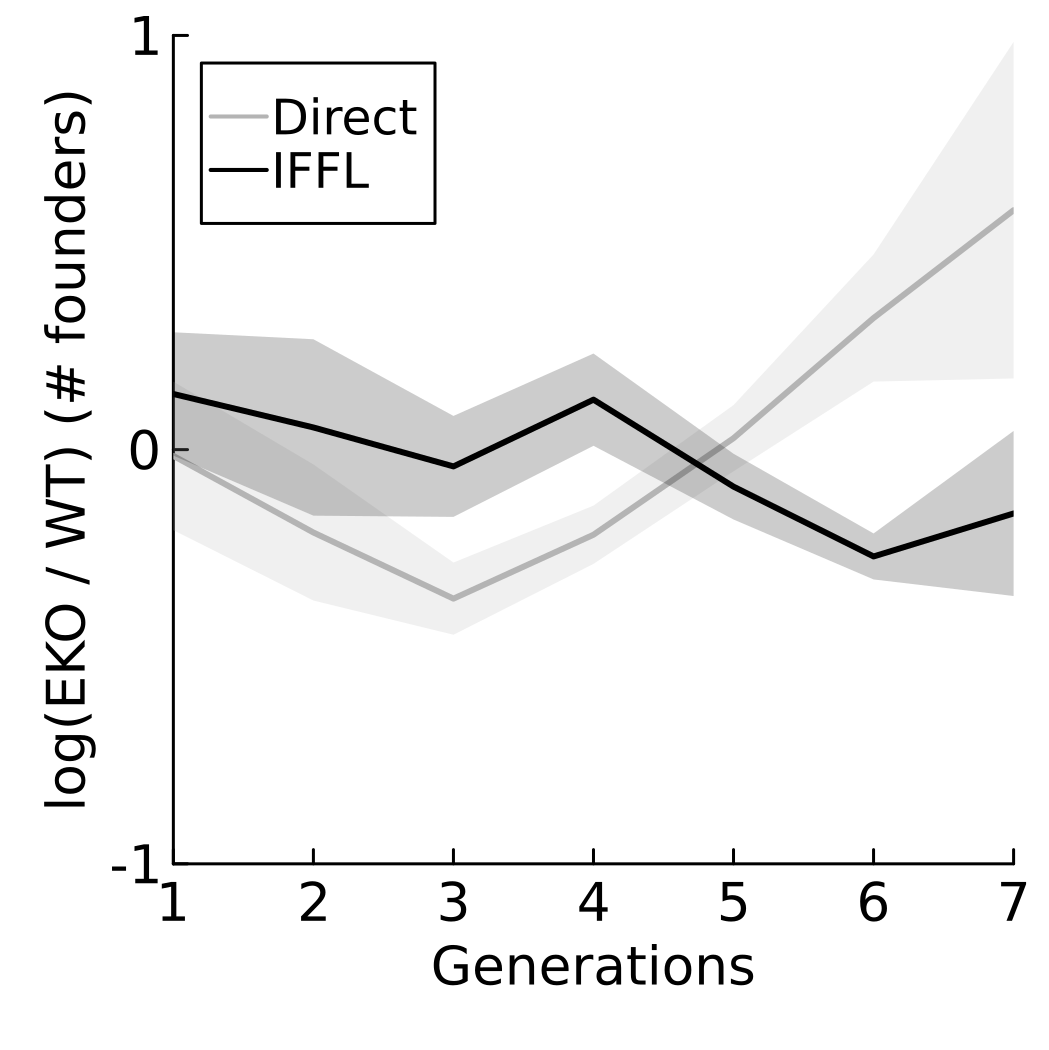

In [158]:
RATIO_NO_meanGEN = KO_NO_meanGEN ./ WT_NO_meanGEN;
RATIO_NO_stdGEN = RATIO_NO_meanGEN .* sqrt.((KO_NO_stdGEN ./ KO_NO_meanGEN).^2 .+ (WT_NO_stdGEN ./ WT_NO_meanGEN).^2);
RATIO_YES_meanGEN = KO_YES_meanGEN ./ WT_YES_meanGEN;
RATIO_YES_stdGEN = RATIO_YES_meanGEN .* sqrt.((KO_YES_stdGEN ./ KO_YES_meanGEN).^2 .+ (WT_YES_stdGEN ./ WT_YES_meanGEN).^2);
ratio_line = Plots.plot(bin_indices, log.(RATIO_NO_meanGEN), c=RGB(180/255, 180/255, 180/255), size=(350,350), xlabel="Generations", ylabel="log(EKO / WT) (# founders)",grid=false, xlim=(1.0, 7.0), ylim=(-1, 1), label = "Direct", ribbon=RATIO_NO_stdGEN, yticks=(-1:1, -1:1), fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=:topleft)
Plots.plot!(ratio_line, log.(RATIO_YES_meanGEN), c=RGB(0/255, 0/255, 0/255), size=(350,350), xlabel="Generations", ylabel="log(EKO / WT) (# founders)",grid=false, xlim=(1.0, 7.0), label = "IFFL", ribbon=RATIO_YES_stdGEN, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12)


In [159]:
savefig(string(out_dir, "cRel_generationsFinal_ratio.png"))

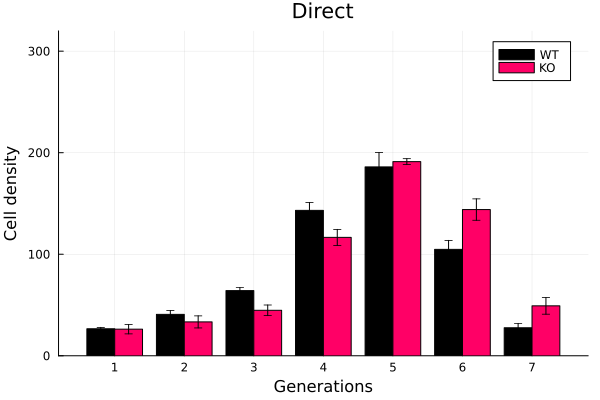

In [112]:
No_histogram = groupedbar(hcat(WT_NO_meanGEN, KO_NO_meanGEN), label=["WT" "KO"], yerr = hcat(WT_NO_stdGEN, KO_NO_stdGEN),
    bar_width=0.8, xlabel="Generations", ylabel="Cell density",ylims=(0, 320),
    title="Direct", color=[RGB(0/255, 0/255, 0/255) RGB(255/255, 0/255, 102/255)], bar_position = :dodge)

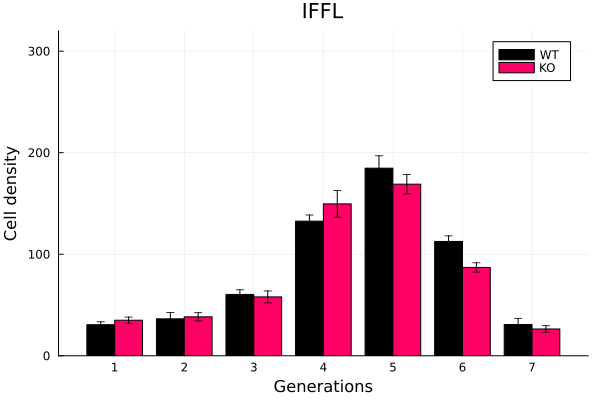

In [113]:
Yes_histogram = groupedbar(hcat(WT_YES_meanGEN, KO_YES_meanGEN), label=["WT" "KO"], yerr = hcat(WT_YES_stdGEN, KO_YES_stdGEN),
    bar_width=0.8, xlabel="Generations", ylabel="Cell density",ylims=(0, 320),
    title="IFFL", color=[RGB(0/255, 0/255, 0/255) RGB(255/255, 0/255, 102/255)], bar_position = :dodge)

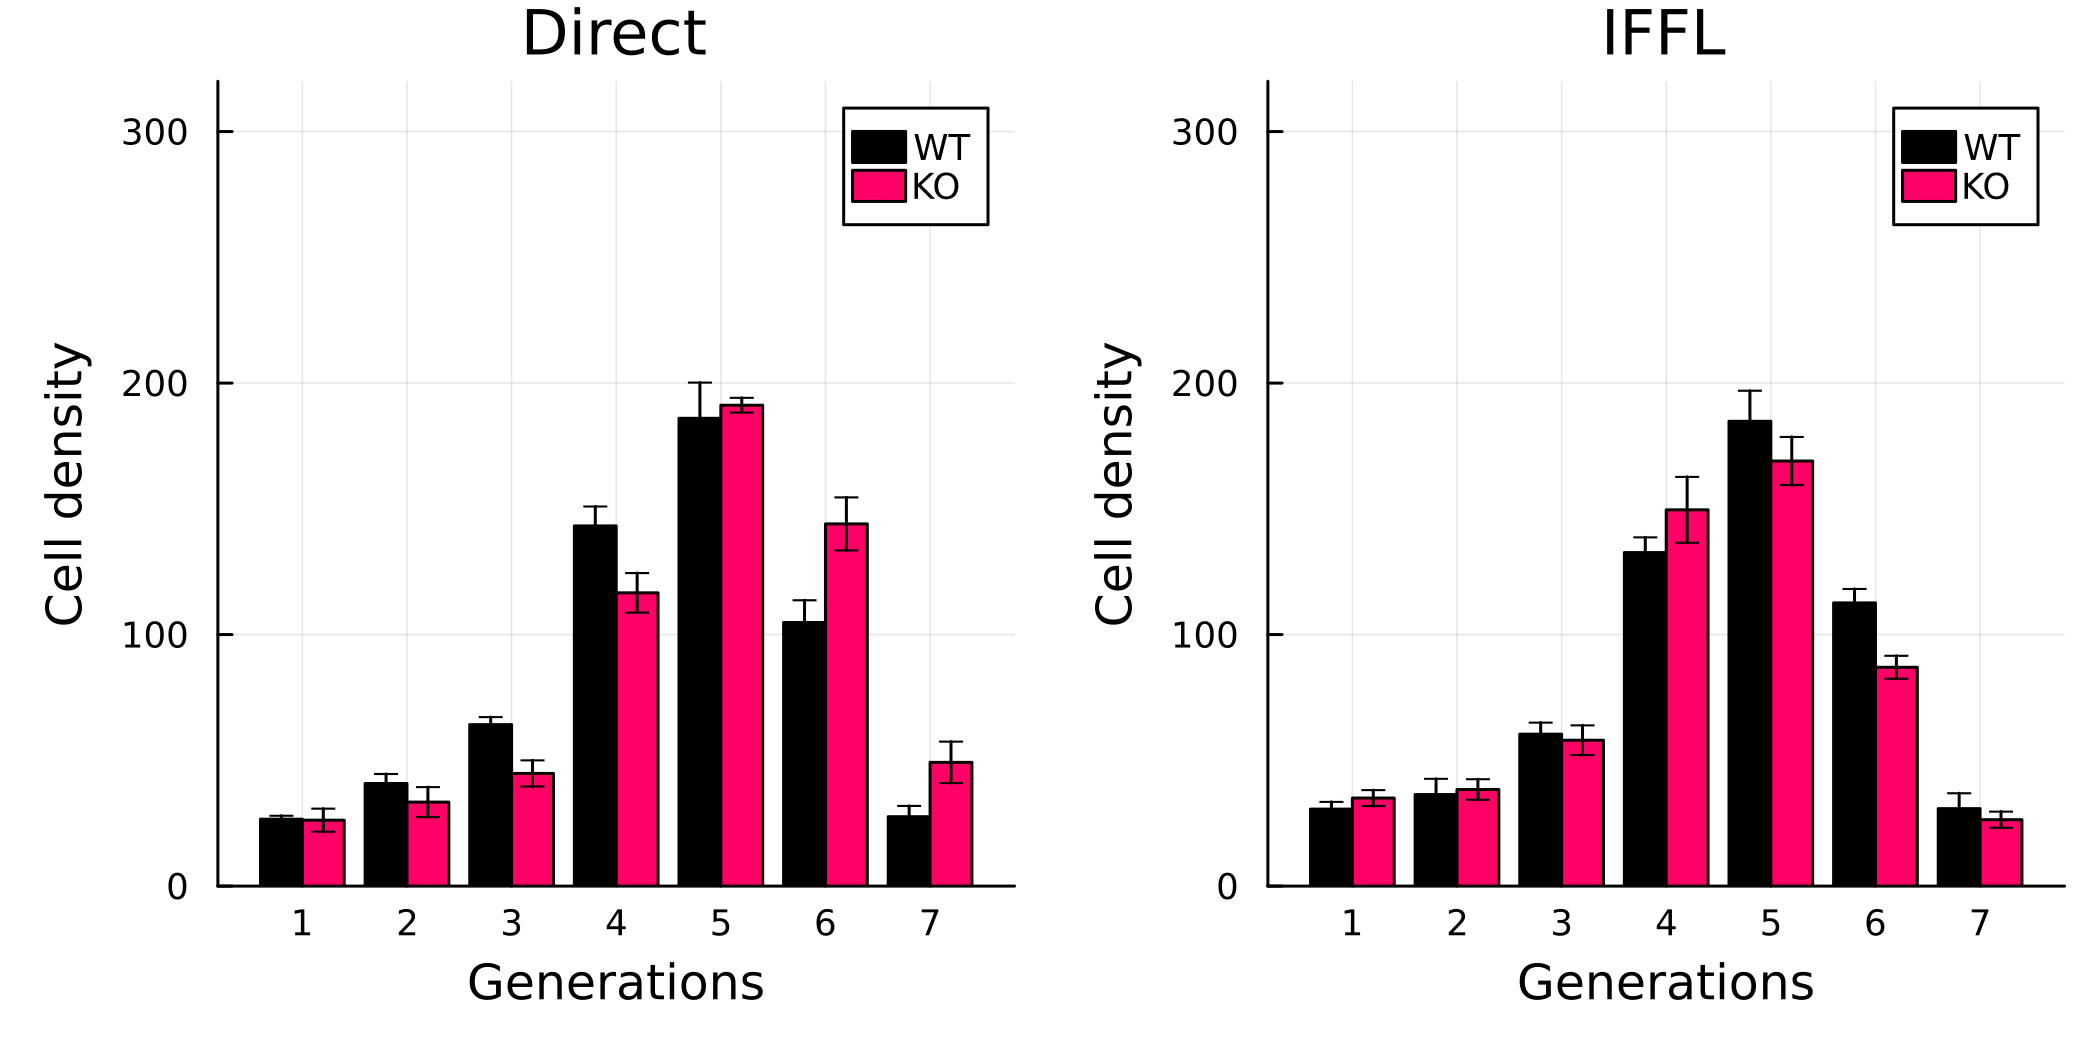

In [114]:
Plots.plot!(No_histogram, Yes_histogram, layout = (1, 2), size=(700,350), left_margin=20Plots.px, bottom_margin=20Plots.px, dpi=300)

In [115]:
savefig(string(out_dir, "cRel_generationsFinal_error.png"))